This plot.ipynb notebook plots the raw and pre-processing data

In [6]:
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add ../analysis to import dataset.py and features.py
sys.path.append(str(Path("..").resolve()))

from dataset import load_csv
from features import pack_sum_and_reads, MeanFromSum, L1Normalize


Load CSV

In [7]:
df = load_csv("../../data/dataset.csv")
df.head()


,timestamp,juice_type,concentration,avg_ch1,avg_ch2,avg_ch3,avg_ch4,avg_ch5,avg_ch6,avg_ch7,avg_ch8,avg_ch9,avg_ch10,avg_ch11,avg_ch12,n_reads
0,2025-12-13T02:37:58,orange,low,914,4699,6662,3263,7053,3304,8372,6085,3595,2067,1072,1284,5
1,2025-12-13T02:38:13,apple,high,915,4700,6662,3263,7053,3304,8373,6086,3595,2067,1072,1284,5


Build X (raw) and labels

In [15]:
avg_cols = [c for c in df.columns if c.startswith("avg_ch")]
avg_cols = sorted(avg_cols, key=lambda c: int(c.replace("avg_ch", "")))

X_avg = df[avg_cols].to_numpy(dtype=np.float64)
juice = df["juice_type"].astype(str).to_numpy()
fresh = df["concentration"].astype(str).to_numpy()

n_samples, n_channels = X_avg.shape
print("Samples:", n_samples)
print("Channels:", n_channels)
print("Juice types:", sorted(set(juice)))
print("Concentration/Freshness levels:", sorted(set(fresh)))


Samples: 2
Channels: 12
Juice types: ['apple', 'orange']
Concentration/Freshness levels: ['high', 'low']


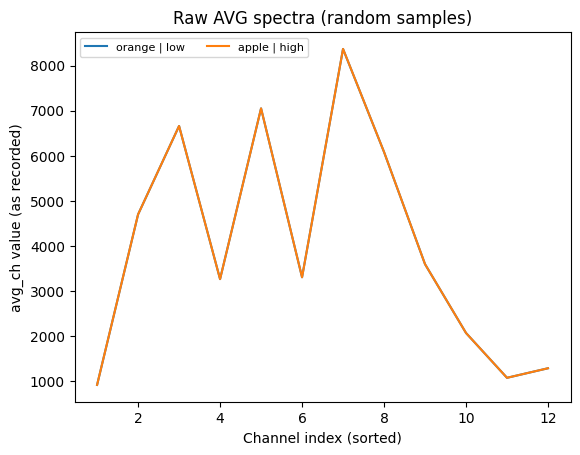

In [16]:
rng = np.random.default_rng(42)
idx = rng.choice(n_samples, size=min(10, n_samples), replace=False)

x_axis = np.arange(1, n_channels + 1)

plt.figure()
for i in idx:
    plt.plot(x_axis, X_avg[i], label=f"{juice[i]} | {fresh[i]}")

plt.xlabel("Channel index (sorted)")
plt.ylabel("avg_ch value (as recorded)")
plt.title("Raw AVG spectra (random samples)")
plt.legend(fontsize=8, ncol=2)
plt.show()


In [18]:
USE_LOG = False  # set True to try log transform

X_work = X_avg.copy()

if USE_LOG:
    X_work = LogTransform().fit_transform(X_work)

X_feat = L1Normalize().fit_transform(X_work)

print("X_feat shape:", X_feat.shape)
print("Row sums (should be ~1):", X_feat[:5].sum(axis=1))


X_feat shape: (2, 12)
Row sums (should be ~1): [1. 1.]


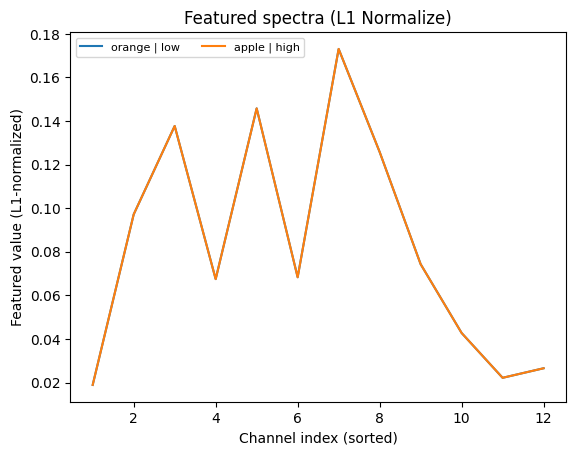

In [19]:
plt.figure()
for i in idx:
    plt.plot(x_axis, X_feat[i], label=f"{juice[i]} | {fresh[i]}")

plt.xlabel("Channel index (sorted)")
plt.ylabel("Featured value (L1-normalized)")
title = "Featured spectra (Log -> L1 Normalize)" if USE_LOG else "Featured spectra (L1 Normalize)"
plt.title(title)
plt.legend(fontsize=8, ncol=2)
plt.show()


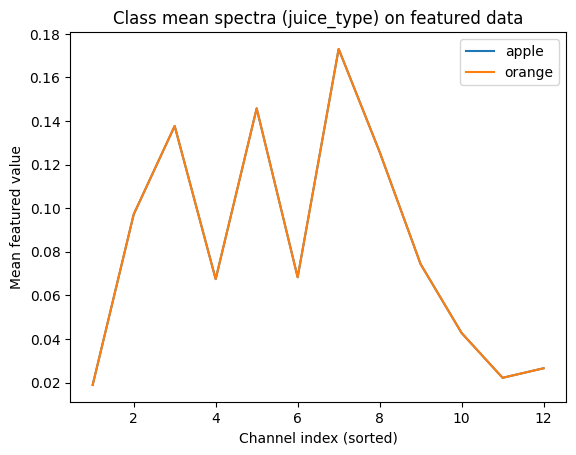

In [20]:
plt.figure()

for j in sorted(set(juice)):
    mask = (juice == j)
    avg_feat = X_feat[mask].mean(axis=0)
    plt.plot(x_axis, avg_feat, label=f"{j}")

plt.xlabel("Channel index (sorted)")
plt.ylabel("Mean featured value")
plt.title("Class mean spectra (juice_type) on featured data")
plt.legend()
plt.show()


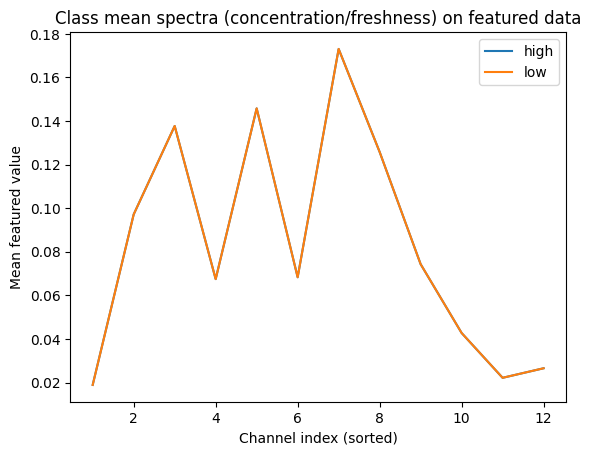

In [21]:
plt.figure()

for f in sorted(set(fresh)):
    mask = (fresh == f)
    avg_feat = X_feat[mask].mean(axis=0)
    plt.plot(x_axis, avg_feat, label=f"{f}")

plt.xlabel("Channel index (sorted)")
plt.ylabel("Mean featured value")
plt.title("Class mean spectra (concentration/freshness) on featured data")
plt.legend()
plt.show()
